# NEBNext Ultra II Directional RNA Library Prep with rRNA Depletion Kit 

| Experiment:   | Illumina NovaSeq Sequencing |
|------|------|
| QC Protocols  | Agilent RNA Screen Tape Assay & Agilent High Sensitivity RNA Screen Tape Assay     |


| Lib Prep Protocols | NEBNext Ultra II Directional RNA Library Prep with rRNA Depletion Kit (human.mouse.rat) |
|------|------|
| Adopter Read 1 | AGATCGGAAGAGCACACGTCTGAACTCCAGTCA |
| Adopter Read 2 | AGATCGGAAGAGCGTCGTGTAGGGAAAGAGTG  |

In [171]:
%%bash
ls *_R[1-2]_001*

16207X1_190807_A00421_0097_AHCHHWDRXX_S8_L001_R1_001.fastq.gz
16207X1_190807_A00421_0097_AHCHHWDRXX_S8_L001_R2_001.fastq.gz
16207X2_190807_A00421_0097_AHCHHWDRXX_S7_L001_R1_001.fastq.gz
16207X2_190807_A00421_0097_AHCHHWDRXX_S7_L001_R2_001.fastq.gz
16207X3_190807_A00421_0097_AHCHHWDRXX_S6_L001_R1_001.fastq.gz
16207X3_190807_A00421_0097_AHCHHWDRXX_S6_L001_R2_001.fastq.gz
16207X4_190807_A00421_0097_AHCHHWDRXX_S5_L001_R1_001.fastq.gz
16207X4_190807_A00421_0097_AHCHHWDRXX_S5_L001_R2_001.fastq.gz
16207X5_190807_A00421_0097_AHCHHWDRXX_S4_L001_R1_001.fastq.gz
16207X5_190807_A00421_0097_AHCHHWDRXX_S4_L001_R2_001.fastq.gz
16207X6_190807_A00421_0097_AHCHHWDRXX_S3_L001_R1_001.fastq.gz
16207X6_190807_A00421_0097_AHCHHWDRXX_S3_L001_R2_001.fastq.gz
16207X7_190807_A00421_0097_AHCHHWDRXX_S2_L001_R1_001.fastq.gz
16207X7_190807_A00421_0097_AHCHHWDRXX_S2_L001_R2_001.fastq.gz
16207X8_190807_A00421_0097_AHCHHWDRXX_S1_L001_R1_001.fastq.gz
16207X8_190807_A00421_0097_AHCHHWDRXX_S1_L001_R2_001.fastq.gz


### Trimming task

In [ ]:
%%bash
# Trimming task
for f1 in 16207X[1-8]_190807_A00421_0097_AHCHHWDRXX_S[1-8]_L001_R1_001.fastq.gz; do
    f2=${f1/R1_001.fastq.gz/R2_001.fastq.gz};     
    out1=${f1/R1_001.fastq.gz/out1.trim.fastq.gz};     
    out2=${f2/R2_001.fastq.gz/out2.trim.fastq.gz};     
    echo cutadapt -j 12 -q 15 -m 20 -a AGATCGGAAGAGCACACGTCTGAACTCCAGTCA -A AGATCGGAAGAGCGTCGTGTAGGGAAAGAGTG -o $out1 -p $out2 $f1 $f2;
         cutadapt -j 12 -q 15 -m 20 -a AGATCGGAAGAGCACACGTCTGAACTCCAGTCA -A AGATCGGAAGAGCGTCGTGTAGGGAAAGAGTG -o $out1 -p $out2 $f1 $f2 >> log.txt; 
done

In [172]:
%%bash
ls *trim*

16207X1_AHCHHWDRXX_S8_R1.trim.fastq.gz
16207X1_AHCHHWDRXX_S8_R2.trim.fastq.gz
16207X2_AHCHHWDRXX_S7_R1.trim.fastq.gz
16207X2_AHCHHWDRXX_S7_R2.trim.fastq.gz
16207X3_AHCHHWDRXX_S6_R1.trim.fastq.gz
16207X3_AHCHHWDRXX_S6_R2.trim.fastq.gz
16207X4_AHCHHWDRXX_S5_R1.trim.fastq.gz
16207X4_AHCHHWDRXX_S5_R2.trim.fastq.gz
16207X5_AHCHHWDRXX_S4_R1.trim.fastq.gz
16207X5_AHCHHWDRXX_S4_R2.trim.fastq.gz
16207X6_AHCHHWDRXX_S3_R1.trim.fastq.gz
16207X6_AHCHHWDRXX_S3_R2.trim.fastq.gz
16207X7_AHCHHWDRXX_S2_R1.trim.fastq.gz
16207X7_AHCHHWDRXX_S2_R2.trim.fastq.gz
16207X8_AHCHHWDRXX_S1_R1.trim.fastq.gz
16207X8_AHCHHWDRXX_S1_R2.trim.fastq.gz


### Alignment task

In [ ]:
%%bash
for f1 in *_R1.trim.fastq.gz; do
    f2=${f1/_R1.trim.fastq.gz/_R2.trim.fastq.gz};     
	out=${f1/_R1.trim.fastq.gz/_}   
    STAR --outSAMtype BAM SortedByCoordinate --readFilesCommand zcat --runThreadN 8 --sjdbGTFfile /rumi/shams/genomes/mm10/mm10_ensemble_genes.gtf --genomeDir /rumi/shams/genomes/mm10 --readFilesIn $f1 $f2 --outFileNamePrefix $out
done&

In [173]:
%%bash
ls *out.bam

16207X1_AHCHHWDRXX_S8_Aligned.sortedByCoord.out.bam
16207X2_AHCHHWDRXX_S7_Aligned.sortedByCoord.out.bam
16207X3_AHCHHWDRXX_S6_Aligned.sortedByCoord.out.bam
16207X4_AHCHHWDRXX_S5_Aligned.sortedByCoord.out.bam
16207X5_AHCHHWDRXX_S4_Aligned.sortedByCoord.out.bam
16207X6_AHCHHWDRXX_S3_Aligned.sortedByCoord.out.bam
16207X7_AHCHHWDRXX_S2_Aligned.sortedByCoord.out.bam
16207X8_AHCHHWDRXX_S1_Aligned.sortedByCoord.out.bam


### Measure counts

In [ ]:
%%bash
for f in *.out.bam; do
    out=${f/_AHCHHWDRXX_S[1-8]_Aligned.sortedByCoord.out.bam/.gene.fc}
    featureCounts -T 12 -P -B -C -O -t exon -g gene_id -a /rumi/shams/genomes/mm10/mm10_ensemble_genes.gtf -o $out $f;
done

In [175]:
%%bash
ls *.gene.fc 

16207X1.gene.fc
16207X2.gene.fc
16207X3.gene.fc
16207X4.gene.fc
16207X5.gene.fc
16207X6.gene.fc
16207X7.gene.fc
16207X8.gene.fc


### Load R

In [3]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [25]:
%%R
library(DESeq2, quietly = TRUE)
library(tidyverse, quietly = TRUE)
library(ggplot2, quietly = TRUE)
library(gridExtra, quietly = TRUE)
library(ggrepel, quietly = TRUE)
library(EnhancedVolcano, quietly = TRUE)
library(ggpubr, quietly = TRUE)

## Read data 

In [5]:
%%R
files <- list.files(pattern="gene.fc$") 

cell.line   <- c(rep("KO",2),rep("WT",6))
replicate <- c(rep("",2), rep('1',2), rep('2',2), rep('3',2))
sample.type <- c(rep(c("Input","Arc_IP"),4))
cond <- paste(cell.line, sample.type, sep="_")
all_cond <- paste(cell.line, replicate, sample.type, sep="_")

datalist <- lapply(files, function(x){read.table(file=x,header=TRUE,colClasses=c(NA, "NULL", "NULL", "NULL", "NULL", "NULL", NA),check.names=F)})
m <- Reduce(function(...) merge(..., by=1, all = TRUE), datalist)
rownames(m) <- m[,1]
m <- m[,-1]
m[is.na(m)]<-0
m <- round(m)
f_name <- unlist(lapply(colnames(m), function(i) unlist(strsplit(i, "_"))[1]))
colnames(m) <- f_name
colData <- data.frame(cond, row.names=f_name)

# DE Analysis

R[write to console]: converting counts to integer mode

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: found already estimated dispersions, replacing these

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates



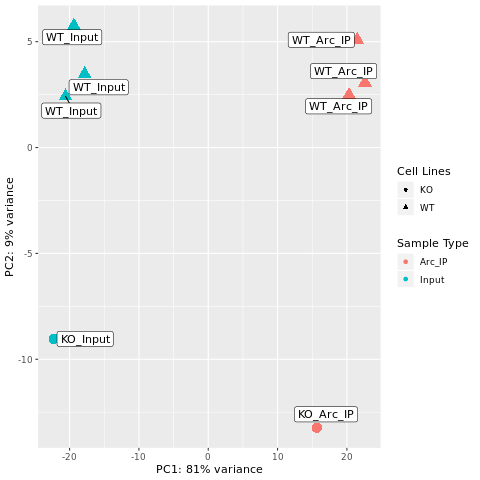

In [6]:
%%R
dds <- DESeqDataSetFromMatrix(countData = m, colData = colData, design = ~ cond)
dds$cond <- relevel(dds$cond, ref="WT_Input")
dds <- DESeq(dds)
cds <- estimateDispersions(dds)
vsd <- varianceStabilizingTransformation(cds)
## PCA Plot 
z <- plotPCA(vsd,intgroup=c("cond"), returnData=TRUE)
percentVar <- round(100 * attr(z, "percentVar"))
p <- ggplot(z, aes(PC1, PC2)) +
  geom_point(aes(size = 4, color = sample.type, shape = cell.line)) +
  xlab(paste0("PC1: ",percentVar[1],"% variance")) +
  ylab(paste0("PC2: ",percentVar[2],"% variance")) +
  geom_label_repel(label = cond, force = 10) +
  labs(shape="Cell Lines", colour="Sample Type") +
  guides(size = FALSE)
print (p)

### Model $$(WT ArcIP - WT Input) - (KO ArcIP - KO Input)$$

In [12]:
%%R
# normalized counts 
ncu <- counts(dds, normalized=TRUE)
# Raw tabels 
write.table(ncu, file="gene_count_table_DE2norm.txt", sep="\t", quote=FALSE, col.names=all_cond) 
write.table(m, file="gene_count_table_raw.txt", sep="\t", quote=FALSE, col.names=all_cond )
# model:
res <- results(dds, contrast=list(c('cond_WT_Arc_IP_vs_WT_Input', 'cond_KO_Input_vs_WT_Input'),
                                   c('cond_KO_Arc_IP_vs_WT_Input')), listValues=c(1,-1))
write.table(res, "WT_Arc_IP_vs_Input_VS_KO_Arc_IP_vs_Input.txt", sep="\t", quote=FALSE, col.names=NA)
# Positive results 
res <- data.frame(res, row.names = rownames(res))
positive_res <- res %>% 
                rownames_to_column('gene') %>%
                filter(log2FoldChange > 0 & pvalue < 1e-3)
positive_ncu <- ncu[positive_res$gene,]

write.table(positive_res, file="positive_WT_Arc_IP_vs_Input_VS_KO_Arc_IP_vs_Input.txt", sep="\t", quote=FALSE, col.names=NA )
write.table(positive_ncu, file="positive_gene_count_table_DE2norm.txt", sep="\t", quote=FALSE, col.names=all_cond) 
# Print model results:
resultsNames(dds)

[1] "Intercept"                  "cond_KO_Arc_IP_vs_WT_Input"
[3] "cond_KO_Input_vs_WT_Input"  "cond_WT_Arc_IP_vs_WT_Input"


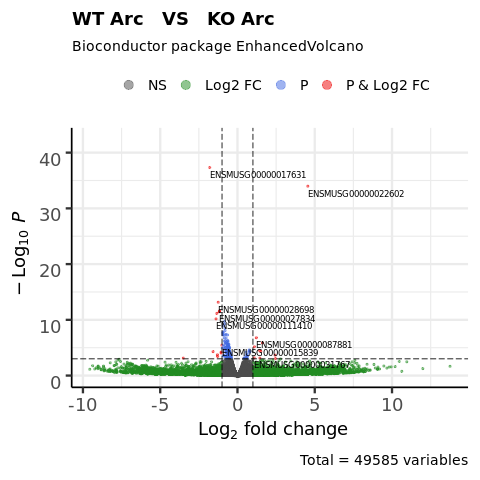

In [13]:
%%R
# Volcano plot 
vol <- EnhancedVolcano(res,
    lab = rownames(res),
    x = 'log2FoldChange',
    y = 'pvalue',
#     xlim = c(-6, 6),
    title = 'WT Arc   VS   KO Arc',
    pCutoff = 1e-3,
    FCcutoff = 1)
print (vol)

In [15]:
%%R
# check top genes 
top_genes <- rownames (positive_ncu)
myplots <- list() 
check <- data.frame()
for (g in 1:length(top_genes)){
    check <- rbind(check,data.frame(
                        'Differential_Expression' = c(
                            ncu[top_genes[g],rownames(subset (colData,cond == 'WT_Arc_IP'))] -
                            ncu[top_genes[g],rownames(subset (colData,cond == 'WT_Input'))],
                            ncu[top_genes[g],rownames(subset (colData,cond == 'KO_Arc_IP'))] -
                            ncu[top_genes[g],rownames(subset (colData,cond == 'KO_Input'))]),
                        'Conversion' = c(rep('WT_ArcIP_vs_Input',3),rep('KO_ArcIP_vs_Input',1)),
                        'Gene' = top_genes[g]))
    rownames(check) <- c()

}

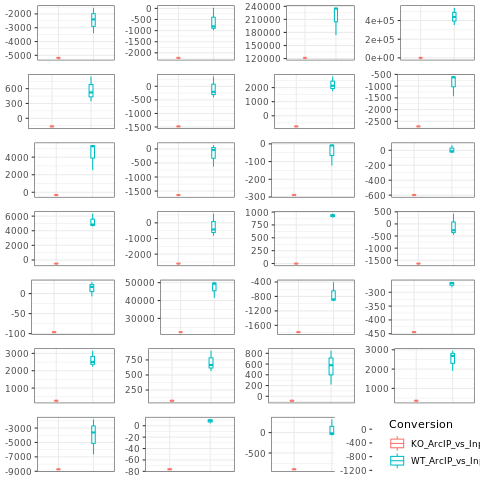

In [87]:
%%R 
# draw plots 
plist <- list()
pcntr <- 1
for (g in unique(check$Gene)){
    p <- ggplot(data = check %>% filter ( Gene == g ), 
                mapping = aes(x = Conversion, y = Differential_Expression, color = Conversion)) +
    geom_boxplot(width=0.1) +
    scale_fill_grey() 
    if (pcntr < length (unique(check$Gene))){
    p <- p +
        theme_bw() + 
        theme(axis.title.x=element_blank(), axis.text.x=element_blank(),
              axis.ticks.x=element_blank(), axis.title.y=element_blank(), legend.position="none")
    } else {
    p <- p +
        theme_bw() + 
        theme(axis.title.x=element_blank(), axis.text.x=element_blank(),
              axis.ticks.x=element_blank(), axis.title.y=element_blank(), legend.position = "right")
    }
    plist[[pcntr]] <- p
    pcntr <- pcntr + 1
}
do.call(grid.arrange, c(plist, ncol = 4))

# _de-novo_ transcript annotation

In [ ]:
%%bash 
# merge all .bam files 
samtools merge -@ 12 all.merged.bam *.bam
# sort the merged file 
samtools sort -@12 all.merged.bam > all.merged.sort.bam
# using scallop to make de-novo transcipt annotation (.gtf file)
scallop --library_type first -i all.merged.sort.bam -o all.merged.scallop.gtf

In [186]:
%%bash 
ls *.gtf

all.merged.scallop.gtf


### Measure counts

In [ ]:
%%bash
for f in *out.bam; do
    out=${f/_AHCHHWDRXX_S[1-8]_Aligned.sortedByCoord.out.bam/.denovo.fc}
    featureCounts -T 12 -P -B -C -O -t exon -g gene_id -a /rumi/shams/abe/People/Jason/all.merged.scallop.gtf -o $out $f;
done

In [188]:
%%bash
ls *.denovo.fc

16207X1.denovo.fc
16207X2.denovo.fc
16207X3.denovo.fc
16207X4.denovo.fc
16207X5.denovo.fc
16207X6.denovo.fc
16207X7.denovo.fc
16207X8.denovo.fc


### Load R

In [2]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [88]:
%%R
library(DESeq2, quietly = TRUE)
library(tidyverse, quietly = TRUE)
library(ggplot2, quietly = TRUE)
library(ggrepel, quietly = TRUE)
library(EnhancedVolcano, quietly = TRUE)
library(ggpubr, quietly = TRUE)

## Read data 

In [93]:
%%R
files <- list.files(pattern="denovo.fc$")

cell.line   <- c(rep("KO",2),rep("WT",6))
replicate <- c(rep("",2), rep('1',2), rep('2',2), rep('3',2))
sample.type <- c(rep(c("Input","Arc_IP"),4))
cond <- paste(cell.line, sample.type, sep="_")
all_cond <- paste(cell.line, replicate, sample.type, sep="_")

datalist <- lapply(files, function(x){read.table(file=x,header=TRUE,colClasses=c(NA, "NULL", "NULL", "NULL", "NULL", "NULL", NA),check.names=F)})
m <- Reduce(function(...) merge(..., by=1, all = TRUE), datalist)
rownames(m) <- m[,1]
m <- m[,-1]
m[is.na(m)]<-0
m <- round(m)
f_name <- unlist(lapply(colnames(m), function(i) unlist(strsplit(i, "_"))[1]))
colnames(m) <- f_name
colData <- data.frame(cond, row.names=f_name)

# DE Analysis

R[write to console]: converting counts to integer mode

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: found already estimated dispersions, replacing these

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates



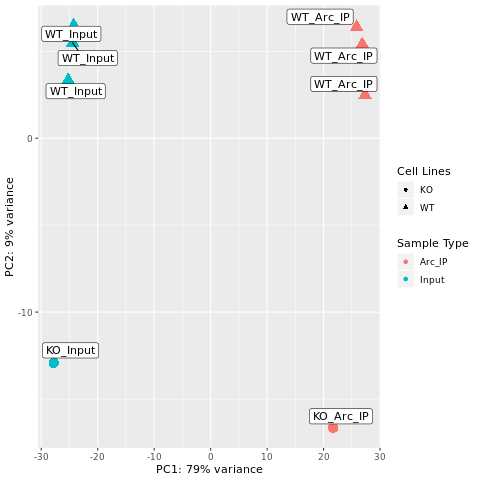

In [94]:
%%R
dds <- DESeqDataSetFromMatrix(countData = m, colData = colData, design = ~ cond)
dds$cond <- relevel(dds$cond, ref="WT_Input")
dds <- DESeq(dds)
cds <- estimateDispersions(dds)
vsd <- varianceStabilizingTransformation(cds)
## PCA Plot 
z <- plotPCA(vsd,intgroup=c("cond"), returnData=TRUE)
percentVar <- round(100 * attr(z, "percentVar"))
p <- ggplot(z, aes(PC1, PC2)) +
  geom_point(aes(size = 4, color = sample.type, shape = cell.line)) +
  xlab(paste0("PC1: ",percentVar[1],"% variance")) +
  ylab(paste0("PC2: ",percentVar[2],"% variance")) +
  geom_label_repel(label = cond, force = 10) +
  labs(shape="Cell Lines", colour="Sample Type") +
  guides(size = FALSE)
print (p)

### Model $$(WT ArcIP - WT Input) - (KO ArcIP - KO Input)$$

In [96]:
%%R
# normalized counts 
ncu <- counts(dds, normalized=TRUE)
# Raw tabels 
write.table(ncu, file="denovo_gene_count_table_DE2norm.txt", sep="\t", quote=FALSE, col.names=all_cond) 
write.table(m, file="denovo_gene_count_table_raw.txt", sep="\t", quote=FALSE, col.names=all_cond)
# model:
res <- results(dds, contrast=list(c('cond_WT_Arc_IP_vs_WT_Input', 'cond_KO_Input_vs_WT_Input'),
                                   c('cond_KO_Arc_IP_vs_WT_Input')), listValues=c(1,-1))
write.table(res, "denovo_WT_Arc_IP_vs_Input_VS_KO_Arc_IP_vs_Input.txt", sep="\t", quote=FALSE, col.names=NA )
# Positive results 
res <- data.frame(res, row.names = rownames(res))
positive_res <- res %>% 
                rownames_to_column('gene') %>%
                filter(log2FoldChange > 0 & pvalue < 1e-3)
positive_ncu <- ncu[positive_res$gene,]

write.table(positive_res, file="denovo_positive_WT_Arc_IP_vs_Input_VS_KO_Arc_IP_vs_Input.txt", sep="\t", quote=FALSE, col.names=NA)
write.table(positive_ncu, file="denovo_positive_gene_count_table_DE2norm.txt", sep="\t", quote=FALSE, col.names=all_cond) 
# Print model results:
resultsNames(dds)

[1] "Intercept"                  "cond_KO_Arc_IP_vs_WT_Input"
[3] "cond_KO_Input_vs_WT_Input"  "cond_WT_Arc_IP_vs_WT_Input"


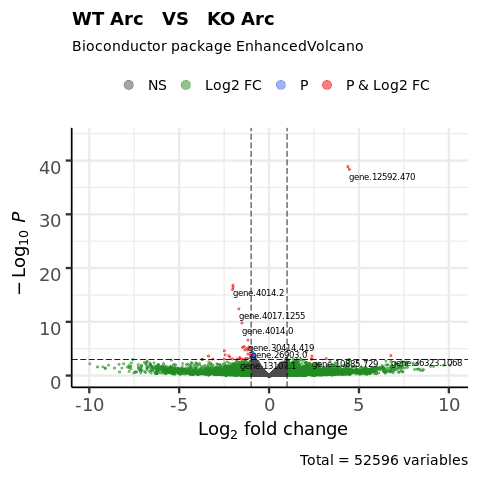

In [97]:
%%R
# Volcano plot 
vol <- EnhancedVolcano(res,
    lab = rownames(res),
    x = 'log2FoldChange',
    y = 'pvalue',
#     xlim = c(-6, 6),
    title = 'WT Arc   VS   KO Arc',
    pCutoff = 1e-3,
    FCcutoff = 1)
print (vol)

In [98]:
%%R
# check top genes 
top_genes <- rownames (positive_ncu)
myplots <- list() 
check <- data.frame()
for (g in 1:length(top_genes)){
    check <- rbind(check,data.frame(
                        'Differential_Expression' = c(
                            ncu[top_genes[g],rownames(subset (colData,cond == 'WT_Arc_IP'))] -
                            ncu[top_genes[g],rownames(subset (colData,cond == 'WT_Input'))],
                            ncu[top_genes[g],rownames(subset (colData,cond == 'KO_Arc_IP'))] -
                            ncu[top_genes[g],rownames(subset (colData,cond == 'KO_Input'))]),
                        'Conversion' = c(rep('WT_ArcIP_vs_Input',3),rep('KO_ArcIP_vs_Input',1)),
                        'Gene' = top_genes[g]))
    rownames(check) <- c()

}

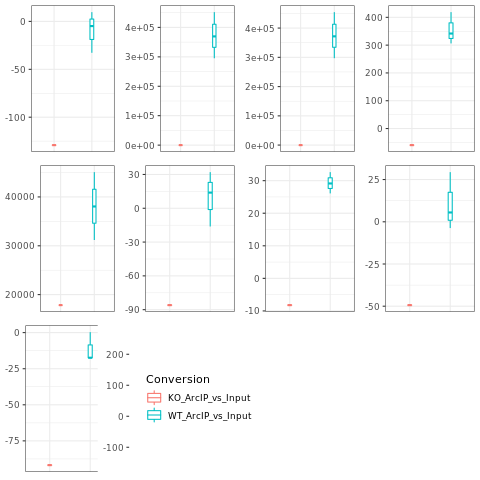

In [99]:
%%R 
# draw plots 
plist <- list()
pcntr <- 1
for (g in unique(check$Gene)){
    p <- ggplot(data = check %>% filter ( Gene == g ), 
                mapping = aes(x = Conversion, y = Differential_Expression, color = Conversion)) +
    geom_boxplot(width=0.1) +
    scale_fill_grey() 
    if (pcntr < length (unique(check$Gene))){
    p <- p +
        theme_bw() + 
        theme(axis.title.x=element_blank(), axis.text.x=element_blank(),
              axis.ticks.x=element_blank(), axis.title.y=element_blank(), legend.position="none")
    } else {
    p <- p +
        theme_bw() + 
        theme(axis.title.x=element_blank(), axis.text.x=element_blank(),
              axis.ticks.x=element_blank(), axis.title.y=element_blank(), legend.position = "right")
    }
    plist[[pcntr]] <- p
    pcntr <- pcntr + 1
}
do.call(grid.arrange, c(plist, ncol = 4))

# Loci Viewer

### Normalize genomecov
> $scale = 1/ Size Factor$

In [100]:
%%R
dds <- estimateSizeFactors(dds)
data.frame('scale' = 1/sizeFactors(dds))

            scale
16207X1 1.0016876
16207X2 0.9676735
16207X3 0.9926122
16207X4 0.9151962
16207X5 1.0445346
16207X6 1.0194176
16207X7 0.9523425
16207X8 1.0873694


In [ ]:
%%bash
bedtools genomecov -bga -ibam 16207X1_AHCHHWDRXX_S8_Aligned.sortedByCoord.out.bam -scale 1.0016876 > 16207X1.cov.bg
bedtools genomecov -bga -ibam 16207X2_AHCHHWDRXX_S7_Aligned.sortedByCoord.out.bam -scale 0.9676735 > 16207X2.cov.bg
bedtools genomecov -bga -ibam 16207X3_AHCHHWDRXX_S6_Aligned.sortedByCoord.out.bam -scale 0.9926122 > 16207X3.cov.bg
bedtools genomecov -bga -ibam 16207X4_AHCHHWDRXX_S5_Aligned.sortedByCoord.out.bam -scale 0.9151962 > 16207X4.cov.bg
bedtools genomecov -bga -ibam 16207X5_AHCHHWDRXX_S4_Aligned.sortedByCoord.out.bam -scale 1.0445346 > 16207X5.cov.bg
bedtools genomecov -bga -ibam 16207X6_AHCHHWDRXX_S3_Aligned.sortedByCoord.out.bam -scale 1.0194176 > 16207X6.cov.bg
bedtools genomecov -bga -ibam 16207X7_AHCHHWDRXX_S2_Aligned.sortedByCoord.out.bam -scale 0.9523425 > 16207X7.cov.bg
bedtools genomecov -bga -ibam 16207X8_AHCHHWDRXX_S1_Aligned.sortedByCoord.out.bam -scale 1.0873694 > 16207X8.cov.bg

In [194]:
ls *.bg

16207X1.cov.bg  16207X3.cov.bg  16207X5.cov.bg  16207X7.cov.bg
16207X2.cov.bg  16207X4.cov.bg  16207X6.cov.bg  16207X8.cov.bg


### index bam files | _.bai_ files

In [33]:
%%bash
# needed for IGV
for f in *out.bam; do
    out=${f/.bam/.bam.bai}
    echo samtools index -@9 $f $out
done

samtools index -@9 16207X1_AHCHHWDRXX_S8_Aligned.sortedByCoord.out.bam 16207X1_AHCHHWDRXX_S8_Aligned.sortedByCoord.out.bam.bai
samtools index -@9 16207X2_AHCHHWDRXX_S7_Aligned.sortedByCoord.out.bam 16207X2_AHCHHWDRXX_S7_Aligned.sortedByCoord.out.bam.bai
samtools index -@9 16207X3_AHCHHWDRXX_S6_Aligned.sortedByCoord.out.bam 16207X3_AHCHHWDRXX_S6_Aligned.sortedByCoord.out.bam.bai
samtools index -@9 16207X4_AHCHHWDRXX_S5_Aligned.sortedByCoord.out.bam 16207X4_AHCHHWDRXX_S5_Aligned.sortedByCoord.out.bam.bai
samtools index -@9 16207X5_AHCHHWDRXX_S4_Aligned.sortedByCoord.out.bam 16207X5_AHCHHWDRXX_S4_Aligned.sortedByCoord.out.bam.bai
samtools index -@9 16207X6_AHCHHWDRXX_S3_Aligned.sortedByCoord.out.bam 16207X6_AHCHHWDRXX_S3_Aligned.sortedByCoord.out.bam.bai
samtools index -@9 16207X7_AHCHHWDRXX_S2_Aligned.sortedByCoord.out.bam 16207X7_AHCHHWDRXX_S2_Aligned.sortedByCoord.out.bam.bai
samtools index -@9 16207X8_AHCHHWDRXX_S1_Aligned.sortedByCoord.out.bam 16207X8_AHCHHWDRXX_S1_Aligned.sortedByCo

In [37]:
ls -l *.bai

-rw-r--r-- 1 abe users 4311552 Oct 29 02:25 16207X1_AHCHHWDRXX_S8_Aligned.sortedByCoord.out.bam.bai
-rw-r--r-- 1 abe users 4421008 Oct 29 02:27 16207X2_AHCHHWDRXX_S7_Aligned.sortedByCoord.out.bam.bai


### Load R

In [2]:
%load_ext rpy2.ipython

/rumi/shams/abe/anaconda3/envs/DEenv/lib/python3.7/site-packages/rpy2/ipython/rmagic.py:77: UserWarning: The Python package `pandas` is strongly recommended when using `rpy2.ipython`. Unfortunately it could not be loaded (error: No module named 'pandas'), but at least we found `numpy`.
  'but at least we found `numpy`.' % str(ie))


In [105]:
%%R
library(Gviz, quietly = TRUE)
library(GenomicRanges, quietly = TRUE)
library(Rsamtools, quietly = TRUE)
library(tidyverse, quietly = TRUE)
library(TxDb.Mmusculus.UCSC.mm10.knownGene, quietly = TRUE)
library(rtracklayer, quietly = TRUE)
library(GenomicFeatures, quietly = TRUE)
library(Sushi, quietly = TRUE)
library(data.table, quietly = TRUE)
# condition labels 
cell.line   <- c(rep("KO",2),rep("WT",6))
replicate <- c(rep("",2), rep('1',2), rep('2',2), rep('3',2))
sample.type <- c(rep(c("Input","Arc_IP"),4))
all_cond <- paste(cell.line, replicate, sample.type, sep="_")

### cleaner function 
fc_cleaner <- function (datagene){
    # chromosomes 
    tmp <- list()
    for (i in datagene$Chr){tmp <- c(tmp,strsplit(i,';')[[1]][1])}
    datagene$Chr <- unlist (tmp)
    # starts 
    tmp <- list()
    for (i in datagene$Start){ tmp <- c(tmp,min(as.numeric(strsplit(i,';')[[1]])))}
    datagene$Start <- as.numeric(unlist (tmp))
    # ends 
    tmp <- list()
    for (i in datagene$End){ tmp <- c(tmp,max(as.numeric(strsplit(i,';')[[1]])))}
    datagene$End <- as.numeric(unlist (tmp))
    # strands
    tmp <- list()
    for (i in datagene$Strand){tmp <- c(tmp,strsplit(i,';')[[1]][1])}
    datagene$Strand <- unlist (tmp)
    return (datagene)
}
# plot generator function 
all_loci_plots <- function (cc, l_scale = NULL, r_scale = NULL, Z_out = 0, y_lim = NULL){
    print (paste ("Top de-novo gene: ", datagene$Geneid[cc]))
    grtrack <- GeneRegionTrack(txdb, genome = 'mm10', 
                               chromosome = datagene$Chr[cc], name = "Gene Model",
                               transcriptAnnotation = "symbol",
                               showId=TRUE, geneSymbol=TRUE,
#                                background.panel = "#FFFEDB",
                               background.title = "darkblue"
                               )
    # 
    denovo_grtrack <- GeneRegionTrack(denovo_txdb, genome = 'mm10', 
                               chromosome = datagene$Chr[cc], name = "De-novo Scallop",
                               transcriptAnnotation = "symbol",
                               background.panel = "#FFFEDB",
                               background.title = "darkblue"
                               )
    # final plot calling
    ots <- list()
    for (d in seq(1, by = 2, len = length(all_cond)/2)){
        #create data
        dtrack <- DataTrack(range = get(paste('bedgraph_X', d,sep='')), genome = "mm10",
                            from = datagene$Start[cc] - Z_out, to = datagene$End[cc] + Z_out,
                            chromosome = datagene$Chr[cc])

        dtrack2<- DataTrack(range = get(paste('bedgraph_X', d + 1,sep='')), genome = "mm10",
                            from = datagene$Start[cc] - Z_out, to = datagene$End[cc] + Z_out,
                            chromosome = datagene$Chr[cc],
                            groups = factor(all_cond[d+1],levels = c(all_cond[d],all_cond[d+1])))
        # Overlay IP and Input
        displayPars(dtrack) <- list(groups = factor(all_cond[d],levels = c(all_cond[d],all_cond[d+1]) ),
                                                    legend = TRUE)
        ots <- append (ots, OverlayTrack(trackList=list(dtrack2, dtrack)))
    }
    itrack <- IdeogramTrack(genome = 'mm10', chromosome = datagene$Chr[cc])
    gtrack <- GenomeAxisTrack()
#     plotTracks(list (itrack, grtrack, denovo_grtrack, gtrack),
#                from = datagene$Start[cc], to = datagene$End[cc],
#                extend.left=l_scale, extend.right=r_scale)
    plotTracks(append (list (denovo_grtrack, gtrack), ots),
               from = datagene$Start[cc] - Z_out, to = datagene$End[cc] + Z_out,
               ylim = y_lim, type = "smooth")
}

In [4]:
%%R
### load genomes
# mm10 ref genome
txdb <- TxDb.Mmusculus.UCSC.mm10.knownGene
# denovo GTF 
denovo_txdb <- makeTxDbFromGFF("all.merged.scallop.gtf")

### read files 
bam_files <- list.files(pattern="out.bam$")
# read all bedgraph files in R
bg_files <- list.files(pattern="cov.bg$")
for (i in 1:length(bg_files)){
    assign(paste0("bedgraph_X", i), 
           fread(bg_files[i],
                 col.names = c('chromosome', 'start', 'end', 'value'))
)}

### top genes 
files <- list.files(pattern="denovo.fc$")
positive <- rownames(read.table(file="denovo_positive_gene_count_table_DE2norm.txt", sep="\t"))
top_genes <- lapply(files, function(x){read.table(file=x,header=TRUE,colClasses=c(NA, NA, NA, NA, NA, NA,'NULL'),check.names=F, stringsAsFactors = F)})[[1]]
top_genes <- top_genes %>% filter ( Geneid %in% positive)
# make top gene dataframe:
datagene <- fc_cleaner(top_genes)
print (datagene)

R[write to console]: Import genomic features from the file as a GRanges object ... 
R[write to console]: OK

R[write to console]: Prepare the 'metadata' data frame ... 
R[write to console]: OK

R[write to console]: Make the TxDb object ... 
R[write to console]: OK



            Geneid   Chr     Start       End Strand Length
1    gene.2231.292 chr10 108693373 108697748      -   4376
2     gene.5846.41 chr12  78364500  78368210      +   3711
3   gene.10885.729 chr14 105681729 105682248      +    520
4   gene.12592.470 chr15  74669317  74672559      +   2953
5  gene.12594.1109 chr15  74667931  74673859      -   5684
6   gene.26755.196  chr3  69344666  69362120      +  17455
7   gene.35943.203  chr6 146942382 146945877      +   3449
8  gene.36323.1068  chr7  28150214  28150494      -    281
9   gene.38411.615  chr8   4620668   4621272      +    605
10    gene.43040.9  chrX  21484510  21488339      +   2568


[1] "Top de-novo gene:  gene.2231.292"


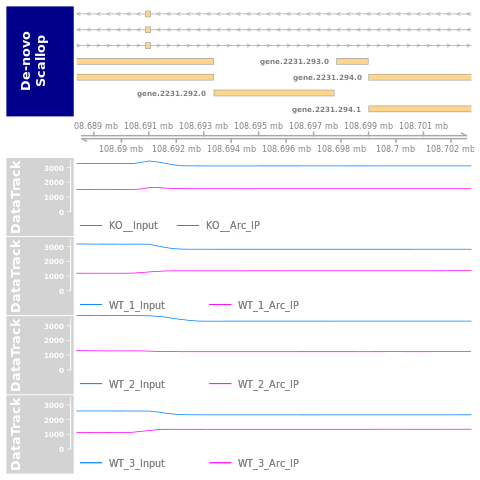

In [98]:
%%R
all_loci_plots (1, 43e4, 38e4, Z_out = 5e3, y_lim = c(0,3500))

[1] "Top de-novo gene:  gene.5846.41"


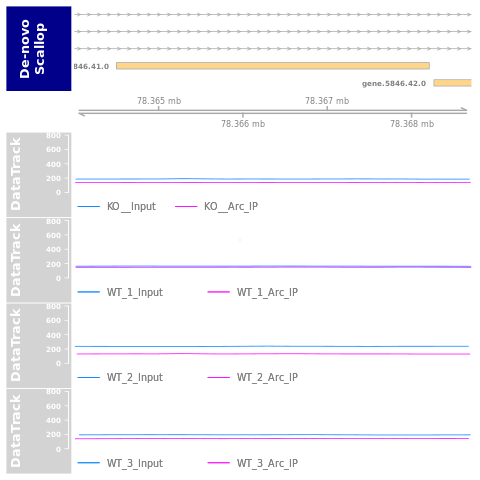

In [89]:
%%R
all_loci_plots (2, 38e4, 38e4, Z_out = 500, y_lim = c(0,800))

[1] "Top de-novo gene:  gene.10885.729"


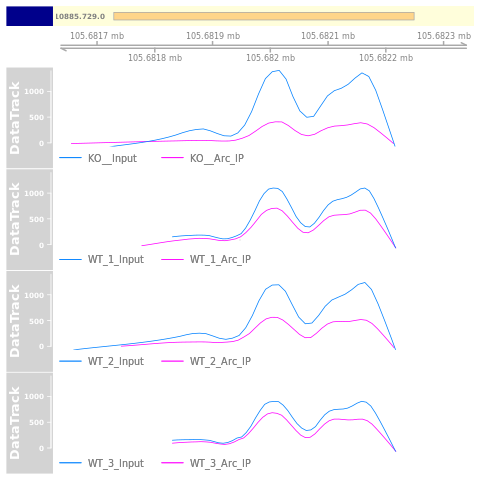

In [103]:
%%R
all_loci_plots (3, 150, 80, Z_out = 100, y_lim = c(0,1400))

[1] "Top de-novo gene:  gene.12592.470"


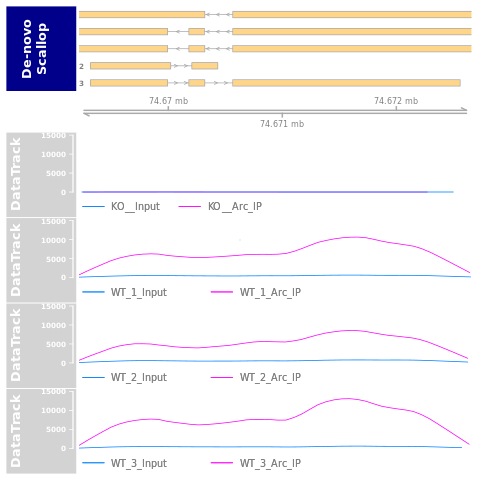

In [91]:
%%R
all_loci_plots (4, 3e3, 4e2, Z_out = 100, y_lim = c(-100,15e3))

[1] "Top de-novo gene:  gene.12594.1109"


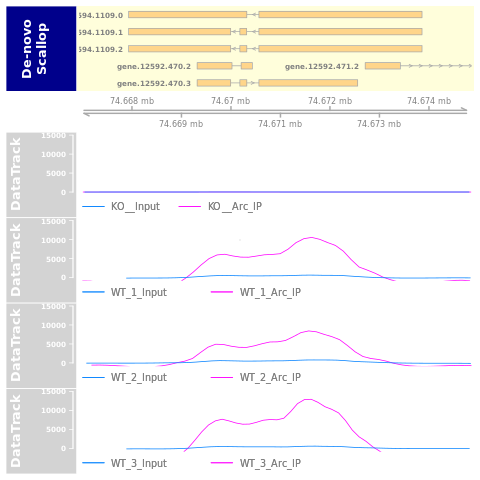

In [104]:
%%R
all_loci_plots (5, 3e3, 3e3, Z_out = 1e3, y_lim = c(-100,15000))

[1] "Top de-novo gene:  gene.26755.196"


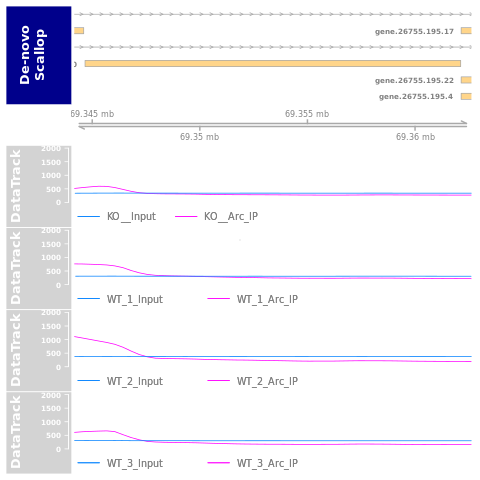

In [93]:
%%R
all_loci_plots (6, 13e4, 23e4, Z_out = 500, y_lim = c(0,2000))

[1] "Top de-novo gene:  gene.35943.203"


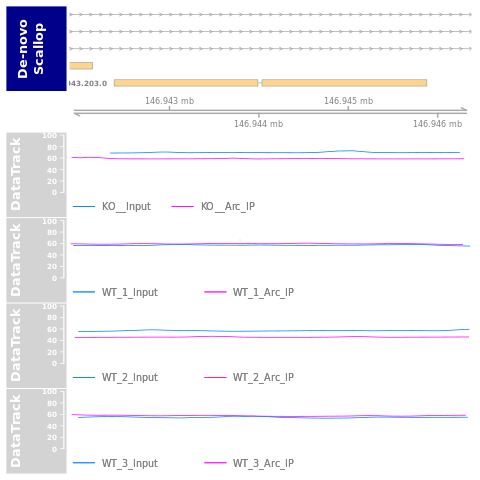

In [94]:
%%R
all_loci_plots (7, 14e4, 10e4, Z_out = 500, y_lim = c(0,100))

In [106]:
%%R
all_loci_plots (8) #, 3.5e4, 1.8e4) # , Z_out = 100) # , y_lim = c(0,100))

[1] "Top de-novo gene:  gene.36323.1068"


R[write to console]: Error in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE,  : 
  NA/NaN/Inf in foreign function call (arg 1)
Calls: <Anonymous> ... <Anonymous> -> panel.loess -> loess.smooth -> simpleLoess

R[write to console]: In addition: 
R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 




Error in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE,  : 
  NA/NaN/Inf in foreign function call (arg 1)
Calls: <Anonymous> ... <Anonymous> -> panel.loess -> loess.smooth -> simpleLoess


[1] "Top de-novo gene:  gene.38411.615"


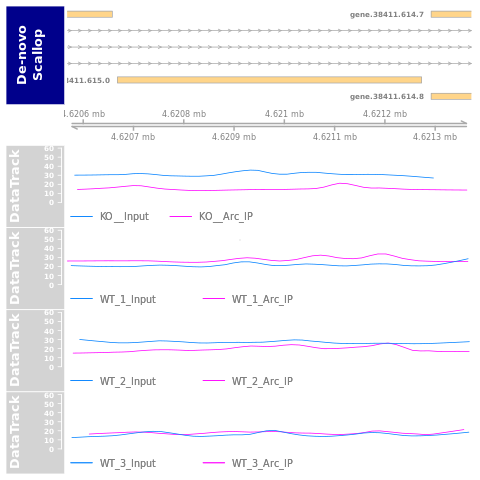

In [96]:
%%R
all_loci_plots (9, 2e4, 1.8e4, Z_out = 100, y_lim = c(0,60))

[1] "Top de-novo gene:  gene.43040.9"


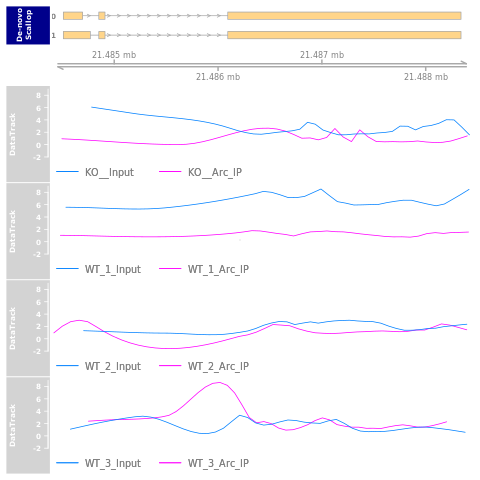

In [97]:
%%R
all_loci_plots (10, 2.5e3, 1.5e3, Z_out = 100, y_lim = c(-2,9))